<a href="https://colab.research.google.com/github/lutikirill007/-/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%BF%D0%BE_%D0%BE%D0%BF%D1%80%D0%BE%D1%81%D1%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сперва, чтобы начать анализ нам необходимо получить данные, для этого был проведен опрос, который находится по ссылке https://docs.google.com/forms/d/e/1FAIpQLSd1ChelJ9pVU5d6hFOjb7v76hVyCAaGS7rfny7CczQnSs0gEw/viewform?usp=header

Результаты опроса мы сохранили в GitHab. С помощью команды !wget  мы копируем файл результатов опроса в нашу среду

In [57]:
!wget "https://raw.githubusercontent.com/lutikirill007/-_-/main/Новая%20форма%20(Ответы)%20(1).xlsx"


--2026-02-01 09:16:23--  https://raw.githubusercontent.com/lutikirill007/-_-/main/%D0%9D%D0%BE%D0%B2%D0%B0%D1%8F%20%D1%84%D0%BE%D1%80%D0%BC%D0%B0%20(%D0%9E%D1%82%D0%B2%D0%B5%D1%82%D1%8B)%20(1).xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51571 (50K) [application/octet-stream]
Saving to: ‘Новая форма (Ответы) (1).xlsx’

Новая форма (Ответы 100%[===================>]  50.36K  --.-KB/s    in 0.01s   

2026-02-01 09:16:23 (4.33 MB/s) - ‘Новая форма (Ответы) (1).xlsx’ saved [51571/51571]



Далее мы переименуем наш файл для более удобного использования


In [58]:
!mv "Новая форма (Ответы) (1).xlsx" data_frame.xlsx


Для анализа мы импортируем необходимы нам библиотеки


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Наш файл представлен в формате Exel. Делаем из нашего файла DataFrame.

In [60]:
df = pd.read_excel('data_frame.xlsx')

С помощью команды head() мы посмотрем несколько первых  строк чтобы определить какие данные у нас представлены

In [61]:
df.head()

,Отметка времени,Ваш возраст,Ваш пол,"Ваш личный ежемесячный доход (после налогов, примерно)",Как часто вы покупаете одежду (кроме нижнего белья и носков)?,Какой у вас средний чек на покупку одежды (за один поход в магазин или один онлайн-заказ)?,Цена,Качество материалов и пошива,Соответствие последним модным тенденциям,Удобство и комфорт при носке,...,Я чувствую давление со стороны общества/моды в необходимости постоянно обновлять гардероб.,Сезонность (необходимость купить вещь к началу сезона).,"Изменение жизненной ситуации (новая работа, переезд, новое хобби).",«Капсульность» вещи — ее способность составлять несколько образов с минимальным набором других вещей.,"А. Вещь от известного fast-fashion бренда, модная, но из недолговечных материалов.\nБ. Вещь от неизвестного бренда, классического кроя, из 100% качественного натурального материала.","А. Вещь, которую вы видели в рекламе у 5 разных блогеров.\nБ. Та же по качеству и стилю вещь от другого бренда, которую вы нашли сами, и о которой почти нет отзывов.","А. Идеальная по всем параметрам вещь, но доставка 3 недели.\nБ. Вещь с небольшим компромиссом (например, по цвету), но доставка завтра.","Опишите случай, когда вы купили вещь, которая стала для вас самой ценной в гардеробе (не по цене, а по ощущениям). Почему она так важна?",Что для вас означает словосочетание «разумное потребление» в контексте одежды?,"Если бы у вас был личный стилист-робот с Искусственным Интеллектом, какой была бы ваша самая сложная для него инструкция?"
0,2026-01-08 14:26:52.128,21,Женский,60 – 100 тыс. руб.,Один раз в 2-3 месяца,10-20 тыс. руб.,4,4,3,5,...,3,5,5,5,5,2,3,"Платье, которое стоило для меня слишком дорого...","Если знаю, что вещь не особо будет применяться...","Не люблю ИИ, теперь не могу писать им промты. ..."
1,2026-01-08 14:32:00.003,20,Женский,Менее 30 тыс. руб.,Один раз в месяц/чаще,3-10 тыс. руб.,3,5,3,4,...,3,3,3,1,3,1,2,"покупала толстовку, уступила в плане размера (...","я покупаю вещь, которая мне очень понравилась ...",не было
2,2026-01-08 14:51:36.737,20,Женский,Нет стабильного дохода,Один раз в 2-3 месяца,3-10 тыс. руб.,3,5,3,5,...,2,4,2,4,5,3,2,Варежки купленные на ярмарке в Германии. Прият...,"Не покупать то, что ненужно. С умом подхожу к ...",.
3,2026-01-08 15:03:37.797,20,Мужской,30 – 60 тыс. руб.,Один раз в полгода/реже,3-10 тыс. руб.,3,4,3,5,...,2,4,2,3,3,3,2,"Джемпер, хорошее качество, приемлемая цена, ко...",Не знаю,"Найди мне вещь, которая подходит по размеру, х..."
4,2026-01-08 15:40:01.283,19,Мужской,30 – 60 тыс. руб.,Один раз в 2-3 месяца,3-10 тыс. руб.,3,5,2,5,...,1,3,1,1,3,4,1,Такой вещи нет,"Покупка вещей по мере необходимости, кроме нек...","Найди мне вещь, которая: подходит к фигуре, по..."


С помощью команды shape() мы смотрем в каком количестве у нас представлены признаки и объекты


In [62]:
df.shape

(104, 67)

Далее чтобы провести преобразование данных нам необходимо выявить какие признаки у нас являются object. С помощью команды info() мы можем посмотреть к какому формату у нас относится каждый признак. Можно заметить, что у нас 18 признаков которые нам необходимо преобразовать.  

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 67 columns):
 #   Column                                                                                                                                                                                Non-Null Count  Dtype         
---  ------                                                                                                                                                                                --------------  -----         
 0   Отметка времени                                                                                                                                                                       104 non-null    datetime64[ns]
 1   Ваш возраст                                                                                                                                                                           104 non-null    int64         
 2   Ваш пол           

Удаляем колонку в которой у нас находятся отметки времени запонения формы. Они никак не помогут для построения модели.

In [64]:
df = df.drop(columns=['Отметка времени'])

Далее нам неободимо посмотреть сколько пропусков находится у нас в данных. Можно заметить что у нас нет пропусков, стоит чательно смотреть данные, потому что некоторые признаки могут просто некоректно заполнены.

In [65]:
df.isnull().sum().sort_values(ascending=False)

,0
Ваш возраст,0
Ваш пол,0
"Ваш личный ежемесячный доход (после налогов, примерно)",0
Как часто вы покупаете одежду (кроме нижнего белья и носков)?,0
Какой у вас средний чек на покупку одежды (за один поход в магазин или один онлайн-заказ)?,0
...,...
"А. Вещь, которую вы видели в рекламе у 5 разных блогеров.\nБ. Та же по качеству и стилю вещь от другого бренда, которую вы нашли сами, и о которой почти нет отзывов.",0
"А. Идеальная по всем параметрам вещь, но доставка 3 недели.\nБ. Вещь с небольшим компромиссом (например, по цвету), но доставка завтра.",0
"Опишите случай, когда вы купили вещь, которая стала для вас самой ценной в гардеробе (не по цене, а по ощущениям). Почему она так важна?",0
Что для вас означает словосочетание «разумное потребление» в контексте одежды?,0


Нам необходимо закодировать наши признаки которые представлены в формате object. Для начала начнем с признака пола. Мы кодируем его просто как 0-мужской, 1-женский. Эти данные относится к бинарным признакам без смысла порядка поэтому мы используем LabelEncoder для преобразования данного признака в числа   

In [66]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [67]:
label_encoder = LabelEncoder()
df['Ваш пол'] = label_encoder.fit_transform(df['Ваш пол'])

следующем признаком является доход. Этот признак уже имеет порядок поэтому мы не можем использховать предыдущий способ. В данном случаем нам поможет OrdinalEncoder.

In [68]:
income_categories = [['60 – 100 тыс. руб.', 'Менее 30 тыс. руб.',
       'Нет стабильного дохода', '30 – 60 тыс. руб.',
       'Более 350 тыс. руб.', '100 – 200 тыс. руб.']]
encoder = OrdinalEncoder(categories=income_categories)
df[['Ваш личный ежемесячный доход (после налогов, примерно)']] = encoder.fit_transform(df[['Ваш личный ежемесячный доход (после налогов, примерно)']])

In [69]:
df["Ваш личный ежемесячный доход (после налогов, примерно)"].unique()


array([0., 1., 2., 3., 4., 5.])

In [71]:
df["Как часто вы покупаете одежду (кроме нижнего белья и носков)?"].unique()

array(['Один раз в 2-3 месяца', 'Один раз в месяц/чаще',
       'Один раз в полгода/реже', 'Один раз в сезон'], dtype=object)

In [72]:
incom_categoties = [['Один раз в полгода/реже','Один раз в сезон', 'Один раз в 2-3 месяца', 'Один раз в месяц/чаще']]
encoder = OrdinalEncoder(categories=incom_categoties)
df[["Как часто вы покупаете одежду (кроме нижнего белья и носков)?"]] = encoder.fit_transform(df[["Как часто вы покупаете одежду (кроме нижнего белья и носков)?"]])


In [73]:
df["Какой у вас средний чек на покупку одежды (за один поход в магазин или один онлайн-заказ)?"].unique()

array(['10-20 тыс. руб.', '3-10 тыс. руб.', '20-50 тыс. руб.',
       'До 3 тыс. руб.'], dtype=object)

In [74]:
income_categories = [['До 3 тыс. руб.','3-10 тыс. руб.','10-20 тыс. руб.',  '20-50 тыс. руб.']]
encoder = OrdinalEncoder(categories=income_categories)

df[["Какой у вас средний чек на покупку одежды (за один поход в магазин или один онлайн-заказ)?"]] = encoder.fit_transform(df[["Какой у вас средний чек на покупку одежды (за один поход в магазин или один онлайн-заказ)?"]])

In [76]:
cols = [
    "Официальные сайты брендов",
    "Офлайн-магазины (например - сетевые бренды в ТЦ)",
    "Секонд-хенды / комиссионные магазины",
    "Небольшие локальные магазины / дизайнеры",
    "Социальные сети (прямые покупки через медиа-страницы)",
    "Авито/Юла и другие площадки с бывшими в употреблении вещами",
    "Что больше всего влияет на ваше окончательное решение о покупке одежды онлайн?",
    "Как часто вы возвращаете купленную онлайн одежду из-за несоответствия ожиданиям (размер, цвет, качество)?"
]

for col in cols:
    print(f"\n{col}")
    print(df[col].value_counts(dropna=False))



Официальные сайты брендов
Официальные сайты брендов
Редко      40
Никогда    31
Иногда     21
Часто      12
Name: count, dtype: int64

Офлайн-магазины (например - сетевые бренды в ТЦ)
Офлайн-магазины (например - сетевые бренды в ТЦ)
Иногда     41
Часто      34
Редко      25
Никогда     4
Name: count, dtype: int64

Секонд-хенды / комиссионные магазины
Секонд-хенды / комиссионные магазины
Никогда    72
Редко      21
Иногда      8
Часто       3
Name: count, dtype: int64

Небольшие локальные магазины / дизайнеры
Небольшие локальные магазины / дизайнеры
Редко      41
Никогда    37
Иногда     18
Часто       8
Name: count, dtype: int64

Социальные сети (прямые покупки через медиа-страницы)
Социальные сети (прямые покупки через медиа-страницы)
Никогда    59
Редко      30
Иногда     11
Часто       4
Name: count, dtype: int64

Авито/Юла и другие площадки с бывшими в употреблении вещами
Авито/Юла и другие площадки с бывшими в употреблении вещами
Никогда    72
Редко      22
Иногда      6
Часто   

In [77]:
df['Официальные сайты брендов'].unique()

array(['Часто', 'Редко', 'Иногда', 'Никогда'], dtype=object)

In [78]:
income_categories = [['Никогда','Редко','Иногда', 'Часто']]

encoder = OrdinalEncoder(categories=income_categories)

df[['Официальные сайты брендов']] = encoder.fit_transform(df[['Официальные сайты брендов']])
df[['Крупные онлайн-маркетплейсы (Wildberries, Ozon, Яндекс.Маркет и т.д.)']] = encoder.fit_transform(df[['Крупные онлайн-маркетплейсы (Wildberries, Ozon, Яндекс.Маркет и т.д.)']])
df[['Офлайн-магазины (например - сетевые бренды в ТЦ)']] = encoder.fit_transform(df[['Офлайн-магазины (например - сетевые бренды в ТЦ)']])
df[['Секонд-хенды / комиссионные магазины']] = encoder.fit_transform(df[['Секонд-хенды / комиссионные магазины']])
df[['Небольшие локальные магазины / дизайнеры']] = encoder.fit_transform(df[['Небольшие локальные магазины / дизайнеры']])
df[['Социальные сети (прямые покупки через медиа-страницы)']] = encoder.fit_transform(df[['Социальные сети (прямые покупки через медиа-страницы)']])
df[["Авито/Юла и другие площадки с бывшими в употреблении вещами"]] = encoder.fit_transform(df[["Авито/Юла и другие площадки с бывшими в употреблении вещами"]])



In [79]:
df['Как часто вы возвращаете купленную онлайн одежду из-за несоответствия ожиданиям (размер, цвет, качество)?'].unique()

array(['Редко (примерно 1 из 10 заказов)',
       'Иногда (примерно 2-3 из 10 заказов)',
       'Часто (более 4 из 10 заказов)', 'Никогда',
       'Не покупаю одежду онлайн'], dtype=object)

In [80]:
income_categories = [['Не покупаю одежду онлайн', 'Никогда', 'Редко (примерно 1 из 10 заказов)',
       'Иногда (примерно 2-3 из 10 заказов)',
       'Часто (более 4 из 10 заказов)',
       ]]

encoder = OrdinalEncoder(categories=income_categories)

df[['Как часто вы возвращаете купленную онлайн одежду из-за несоответствия ожиданиям (размер, цвет, качество)?']] = encoder.fit_transform(df[['Как часто вы возвращаете купленную онлайн одежду из-за несоответствия ожиданиям (размер, цвет, качество)?']])



In [81]:
df["Что больше всего влияет на ваше окончательное решение о покупке одежды онлайн?"].head(20)


,Что больше всего влияет на ваше окончательное решение о покупке одежды онлайн?
0,Фотографии от реальных покупателей (не от бренда)
1,Фотографии от реальных покупателей (не от бренда)
2,Фотографии от реальных покупателей (не от брен...
3,"Рейтинг и отзывы других покупателей, Детальное..."
4,"Рейтинг и отзывы других покупателей, Фотографи..."
5,"Детальное описание, состав ткани, размерная се..."
6,Фотографии от реальных покупателей (не от брен...
7,Фотографии от реальных покупателей (не от брен...
8,Фотографии от реальных покупателей (не от брен...
9,"Рейтинг и отзывы других покупателей, Фотографи..."


In [82]:
df["Что больше всего влияет на ваше окончательное решение о покупке одежды онлайн?"] = (df["Что больше всего влияет на ваше окончательное решение о покупке одежды онлайн?"].dropna().apply(lambda x: [i.strip() for i in x.split(',')]))

далее нам необзодимо выбрать закодировать признак в котором выбирали несколько вариантов ответов. OneHotEncoder не подойдет в данном случаем. поэтому нам следует выбрать MultiLabelBinarize

In [83]:
from sklearn.preprocessing import MultiLabelBinarizer

mib = MultiLabelBinarizer()

encoder = mib.fit_transform(df["Что больше всего влияет на ваше окончательное решение о покупке одежды онлайн?"])
encoder_df = pd.DataFrame(encoder, columns=[f"decision_{c}" for c in mib.classes_],index=df.loc[df["Что больше всего влияет на ваше окончательное решение о покупке одежды онлайн?"].notna()].index)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 66 columns):
 #   Column                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                --------------  -----  
 0   Ваш возраст                                                                                                                                                                           104 non-null    int64  
 1   Ваш пол                                                                                                                                                                               104 non-null    int64  
 2   Ваш личный ежемесячный доход (после налогов, п

In [85]:
df = df.drop(columns=["Что больше всего влияет на ваше окончательное решение о покупке одежды онлайн?"])

df = df.join(encoder_df).fillna(0)

In [86]:
df = df.drop(columns=['Что вас чаще всего останавливает или отталкивает от покупки понравившейся вещи? '])
df = df.drop(columns=['Если бы вам пришлось назвать ОДИН самый главный фактор, который чаще всего определяет ваш выбор одежды, что бы это был?'])
df = df.drop(columns=['Опишите случай, когда вы купили вещь, которая стала для вас самой ценной в гардеробе (не по цене, а по ощущениям). Почему она так важна? '])
df = df.drop(columns=['Что для вас означает словосочетание «разумное потребление» в контексте одежды? '])
df = df.drop(columns=['Если бы у вас был личный стилист-робот с Искусственным Интеллектом, какой была бы ваша самая сложная для него инструкция? '])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 69 columns):
 #   Column                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                --------------  -----  
 0   Ваш возраст                                                                                                                                                                           104 non-null    int64  
 1   Ваш пол                                                                                                                                                                               104 non-null    int64  
 2   Ваш личный ежемесячный доход (после налогов, п

In [88]:
df.head(20)

,Ваш возраст,Ваш пол,"Ваш личный ежемесячный доход (после налогов, примерно)",Как часто вы покупаете одежду (кроме нижнего белья и носков)?,Какой у вас средний чек на покупку одежды (за один поход в магазин или один онлайн-заказ)?,Цена,Качество материалов и пошива,Соответствие последним модным тенденциям,Удобство и комфорт при носке,"Универсальность, сочетаемость с другими вещами в гардеробе",...,"А. Идеальная по всем параметрам вещь, но доставка 3 недели.\nБ. Вещь с небольшим компромиссом (например, по цвету), но доставка завтра.",decision_Детальное описание,decision_Мнение друзей или блогеров (если речь о соцсетях),decision_Рейтинг и отзывы других покупателей,decision_Рекомендации сайта («с этим товаром покупают»),decision_Условия доставки (стоимость,decision_Фотографии от реальных покупателей (не от бренда),decision_размерная сетка,decision_состав ткани,decision_сроки) и легкость возврата
0,21,0,0.0,2.0,2.0,4,4,3,5,3,...,3,0,0,0,0,0,1,0,0,0
1,20,0,1.0,3.0,1.0,3,5,3,4,2,...,2,0,0,0,0,0,1,0,0,0
2,20,0,2.0,2.0,1.0,3,5,3,5,5,...,2,1,0,0,0,0,1,1,1,0
3,20,1,3.0,0.0,1.0,3,4,3,5,4,...,2,1,0,1,0,0,0,1,1,0
4,19,1,3.0,2.0,1.0,3,5,2,5,2,...,1,1,1,1,1,1,1,1,1,1
5,20,1,2.0,2.0,3.0,3,5,2,5,5,...,1,1,0,0,0,1,0,1,1,1
6,19,0,2.0,3.0,2.0,3,5,4,5,5,...,1,0,0,0,0,1,1,0,0,1
7,20,0,2.0,2.0,1.0,3,4,4,5,5,...,1,1,0,0,0,1,1,1,1,1
8,20,0,3.0,3.0,1.0,5,5,3,5,4,...,1,1,0,0,0,0,1,1,1,0
9,20,1,2.0,2.0,2.0,4,5,5,5,5,...,1,0,0,1,0,0,1,0,0,0


In [89]:
df.drop(columns=['Ваш возраст'],inplace=True)

далее нам следует посмотреть какие признаки сильно коррелируют между собой

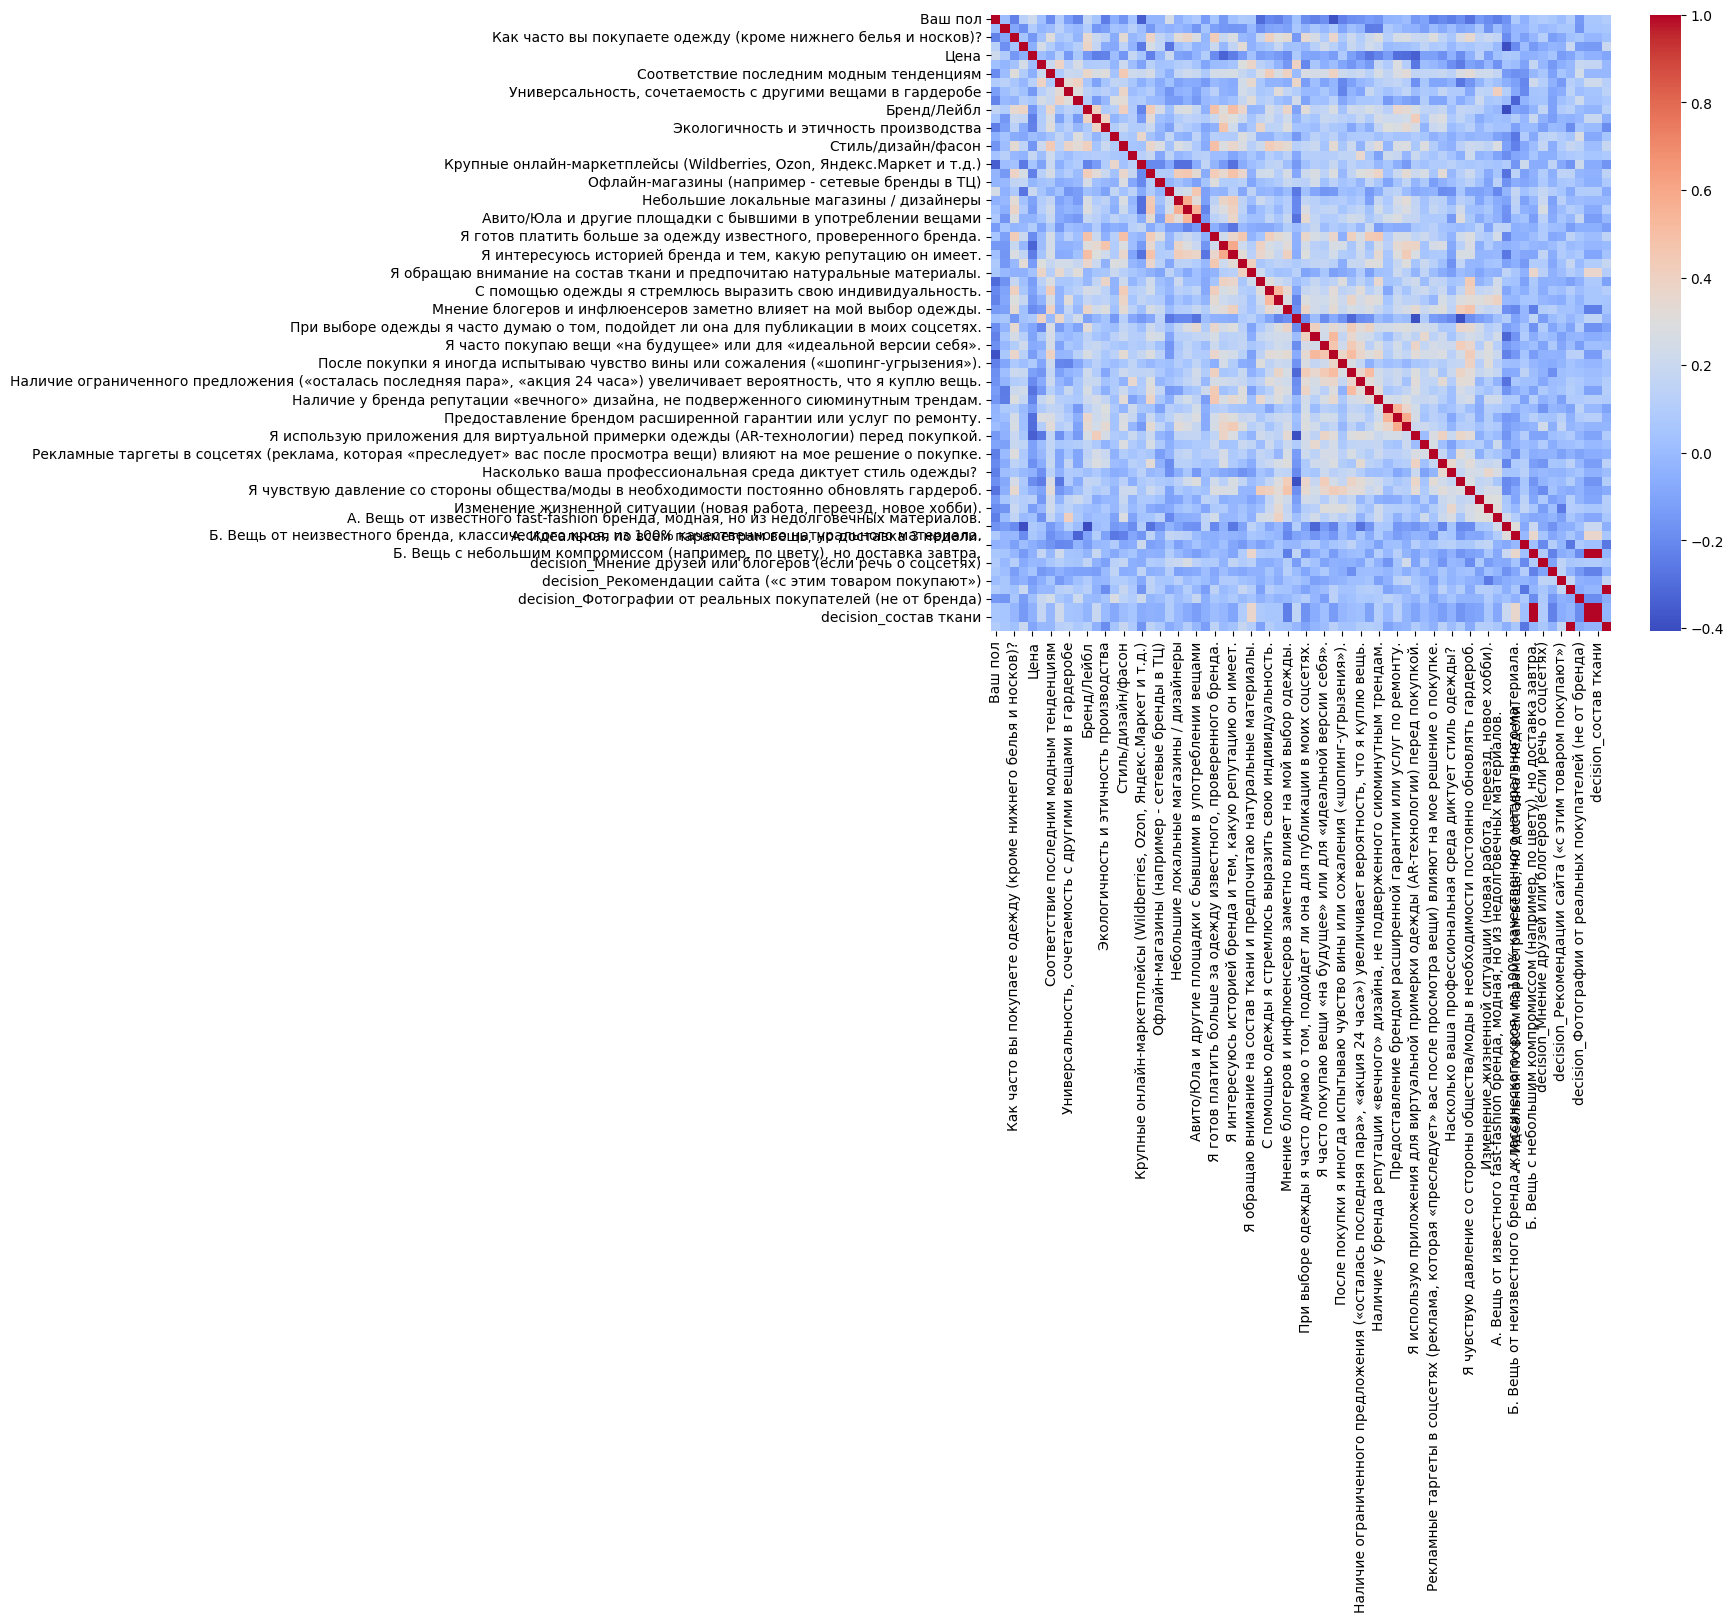

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix =df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

наши данные имеют разные значения, это может нехорошо влиять на клстеризацию. Для этого нам неоходими сделать стандартизацию, для преведению к единому масштабу  

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaler = scaler.fit_transform(df)

Далее мы выполняем иерархическую кластеризацию. В результате выполнения кода мы получаем дерево кластеров, по которму можем определить на сколько кластеров можно распределить данные

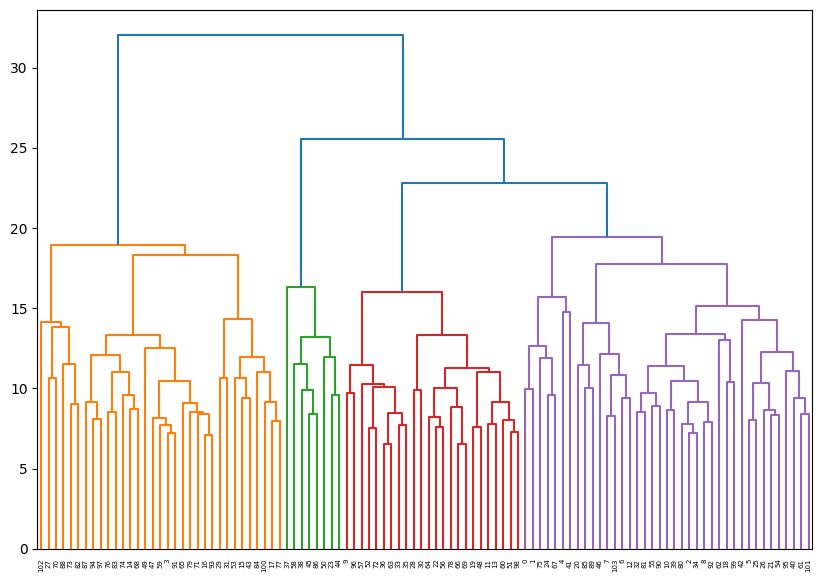

In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_scaler, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

AgglomerativeClustering с sklearn выполняется фактическое разбиение на заданное число кластеров (например, 4), результат — метки кластеров для каждого наблюдения.

In [93]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)
y_agg = agg.fit_predict(df_scaler)


смотрим на метки классов

In [94]:
print(y_agg)

[0 0 0 1 0 0 0 0 0 3 0 3 0 3 1 1 1 1 0 3 0 0 3 2 0 0 0 1 3 1 3 1 0 3 0 3 3
 2 2 0 0 0 0 1 2 2 0 1 3 1 2 3 3 1 0 0 3 3 2 1 3 0 0 3 3 1 3 0 1 3 1 1 3 1
 1 0 1 1 3 1 0 0 1 1 1 0 2 1 1 0 0 1 0 1 1 0 3 1 3 0 1 0 1 0]


In [95]:
df['cluster'] = y_agg

In [98]:
df.head(20)

,Ваш пол,"Ваш личный ежемесячный доход (после налогов, примерно)",Как часто вы покупаете одежду (кроме нижнего белья и носков)?,Какой у вас средний чек на покупку одежды (за один поход в магазин или один онлайн-заказ)?,Цена,Качество материалов и пошива,Соответствие последним модным тенденциям,Удобство и комфорт при носке,"Универсальность, сочетаемость с другими вещами в гардеробе",Посадка по фигуре/соответствие размеру,...,decision_Детальное описание,decision_Мнение друзей или блогеров (если речь о соцсетях),decision_Рейтинг и отзывы других покупателей,decision_Рекомендации сайта («с этим товаром покупают»),decision_Условия доставки (стоимость,decision_Фотографии от реальных покупателей (не от бренда),decision_размерная сетка,decision_состав ткани,decision_сроки) и легкость возврата,cluster
0,0,0.0,2.0,2.0,4,4,3,5,3,5,...,0,0,0,0,0,1,0,0,0,0
1,0,1.0,3.0,1.0,3,5,3,4,2,5,...,0,0,0,0,0,1,0,0,0,0
2,0,2.0,2.0,1.0,3,5,3,5,5,5,...,1,0,0,0,0,1,1,1,0,0
3,1,3.0,0.0,1.0,3,4,3,5,4,4,...,1,0,1,0,0,0,1,1,0,1
4,1,3.0,2.0,1.0,3,5,2,5,2,5,...,1,1,1,1,1,1,1,1,1,0
5,1,2.0,2.0,3.0,3,5,2,5,5,4,...,1,0,0,0,1,0,1,1,1,0
6,0,2.0,3.0,2.0,3,5,4,5,5,5,...,0,0,0,0,1,1,0,0,1,0
7,0,2.0,2.0,1.0,3,4,4,5,5,5,...,1,0,0,0,1,1,1,1,1,0
8,0,3.0,3.0,1.0,5,5,3,5,4,5,...,1,0,0,0,0,1,1,1,0,0
9,1,2.0,2.0,2.0,4,5,5,5,5,4,...,0,0,1,0,0,1,0,0,0,3
